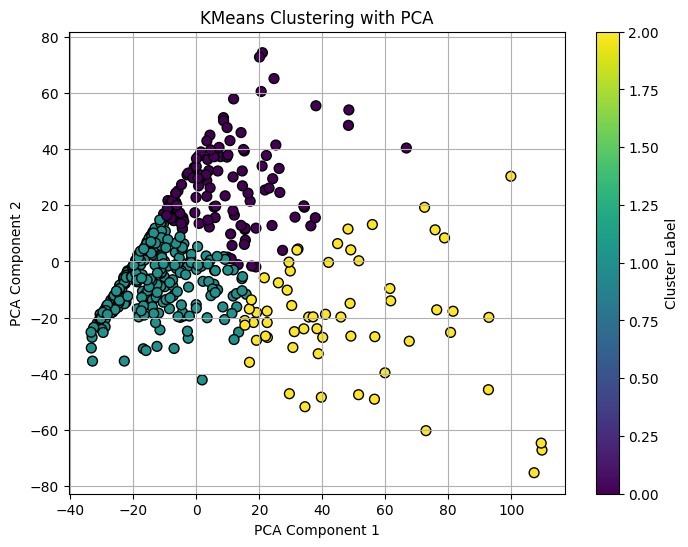

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import pca
from sklearn.decomposition import PCA

# Load the clustering/data/wine.csv dataset
df = pd.read_csv('../clustering/data/SAheart.csv')
#pasar datos categóricos a numéricos
df['famhist'] = df['famhist'].map({'Present': 1, 'Absent': 0})
df.drop(columns=['row.names'], inplace=True)
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values  # Target variable

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df['Cluster'] = labels
# Plot the clusters with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('KMeans Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()

In [17]:
from dsgd import DSClassifierMultiQ
#x = X.values
# Create a DSClassifierMultiQ instance
DSC = DSClassifierMultiQ(3, min_iter=20, max_iter=200, debug_mode=True, lossfn="MSE", num_workers=0, min_dloss=1e-7)
df.drop(columns=['Cluster'], inplace=True)
# Fit the model to the data
losses, epoch, dt = DSC.fit(X, labels, add_single_rules=True, single_rules_breaks=3,add_mult_rules=False, column_names=df.columns, print_every_epochs=1,print_final_model=False)
# Predict the cluster labels for the data


Optimization started
Processing epoch	200	0.0380	
Training time: 18.71s, epochs: 200

Least training loss reached: 0.038


In [18]:
#rules = DSC.find_most_important_rules(threshold=0.5)
DSC.print_most_important_rules(threshold=0.32)
#rules



Most important rules for class 0

	[0.866] R3: sbp > 152.136
			0: 0.777	1: 0.000	2: 0.187	Unc: 0.036

	[0.708] R2: 138.327 < sbp < 152.136
			0: 0.627	1: 0.000	2: 0.172	Unc: 0.201

	[0.666] R28: 17.044 < alcohol < 33.539
			0: 0.448	1: 0.542	2: 0.000	Unc: 0.010

	[0.641] R27: 0.550 < alcohol < 17.044
			0: 0.420	1: 0.557	2: 0.000	Unc: 0.022

	[0.629] R26: alcohol < 0.550
			0: 0.401	1: 0.585	2: 0.000	Unc: 0.014

	[0.628] R11: ldl > 6.136
			0: 0.451	1: 0.425	2: 0.000	Unc: 0.124

	[0.482] R33: age > 52.659
			0: 0.482	1: 0.000	2: 0.000	Unc: 0.518

	[0.334] R7: tobacco > 6.730
			0: 0.197	1: 0.005	2: 0.364	Unc: 0.434

	[0.332] R15: adiposity > 30.649
			0: 0.321	1: 0.000	2: 0.022	Unc: 0.657

	[0.329] R19: 46.489 < typea < 53.104
			0: 0.234	1: 0.220	2: 0.011	Unc: 0.535

Most important rules for class 1

	[0.759] R26: alcohol < 0.550
			0: 0.401	1: 0.585	2: 0.000	Unc: 0.014

	[0.738] R27: 0.550 < alcohol < 17.044
			0: 0.420	1: 0.557	2: 0.000	Unc: 0.022

	[0.733] R28: 17.044 < alcohol 